# Data Science Project: Final Report

Olivia Liang  
Tianyu Zou  
Tommy Xie  

[github link](https://github.com/lsqolivia/Final-Report-34)

## Introduction

Understanding how players interact with online game environments has become increasingly important for researchers who aim to improve user engagement and manage digital resources effectively. In this project, we analyze data collected from a research Mincraft server operated by a Computer Science research group at UBC.   
Our analysis focuses on predicting which players are most likely to subscribe to the project's game-related newsletter. Newsletter subscription serves as a meaningful indivator of deeper engagement, as players who opt in typically show higher interest in the project and a stronger connection to the research community.    
  
We aim to answer the following predictive question in this project:  
**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**  
  
By examining the characteristics and behaviors of different players, we aim to identify the features most predictive of subscription decisions. Understanding these relationships will help stake holders better target communication efforts and develop strategies for recruiting and retaining highly engaged players.

## Data Description

The dataset contains **196 observations** and **7 variables**. The key variables are:

+ `experience`: character that indicates the player’s experience level, categorized as `Pro`, `Veteran`, `Amateur`, `Regular`, or `Beginner`.  
+ `subscribe`: logical that shows whether the player subscribed to game updates (`TRUE` or `FALSE`).  
+ `hashedEmail`: character that stores the hashed email ID of each player.  
+ `played_hours`: double (numeric) that records total playtime in hours, ranging from 0 to 99.
+ `name`: a character variable containing each player's in-game username.
+ `gender`: a character variable indicating the player's self-identified gender.
+ `age`:a numeric variable that representing the player's age in years.
  
**Each row in the dataset corresponds to one unique player on the Minecraft research server.**

### potential issues

1. The hashedEmail column is not interpretable and can be ignored.

2. Experience is categorical; it must be converted into numeric form for modelling.

3. Minor gender categories (Agender, Other, Two-Spirited) have very small counts and could be merged with “Other.”

## Methods & Results

After veiwing the data we decide to use Classification with K-nearest neighbors.

**Loads Data**

Loaded the dataset from a Google Drive link using read_csv().

In [1]:
library(tidyverse)
url = 'https://drive.google.com/uc?export=download&id=1CrHpOItZ_dz1WRDVQdmhn_aSymEQrSBy'
players <- read_csv(url)
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**Wrangle & Clean**

We removed rows with missing age values and filtered out players with zero playtime, since these rows provide no behavioural information for modelling. The subscribe variable was converted to a factor for classification. Only relevant variables were retained for simplicity and consistency with the planned analysis.

In [2]:
clean_players <- players |>
select(c(1,2,4,6,7))

clean_players |>
map_lgl(anyNA)

clean_players <- clean_players |>
filter(!is.na(Age)) |>
filter(played_hours>0)

clean_players$subscribe <- factor(clean_players$subscribe)

experience    subscribe played_hours       gender          Age 
       FALSE        FALSE        FALSE        FALSE         TRUE

**Exploratory Data Analysis**

In [3]:
distinct(players, experience)
distinct(players, subscribe)

players |> 
  summarize(max_played = max(played_hours, na.rm = TRUE),
            min_played = min(played_hours, na.rm = TRUE))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


max_played,min_played
<dbl>,<dbl>
223.1,0


TOMMY, same as this:  
We first checked the unique categories in the experience and subscribe columns to understand the levels present in the data. This confirmed that experience contains the expected five groups (Beginner → Pro) and that subscription status is split into TRUE and FALSE.

Next, we computed simple summaries for the played_hours relevant to our analysis. Playtime ranged from 0 to 223.1 hours, showing a large spread with a few extreme values. The summaries helped us understand the scale of each predictor and identify potential outliers to consider later in the analysis.

**Data Visualizations**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


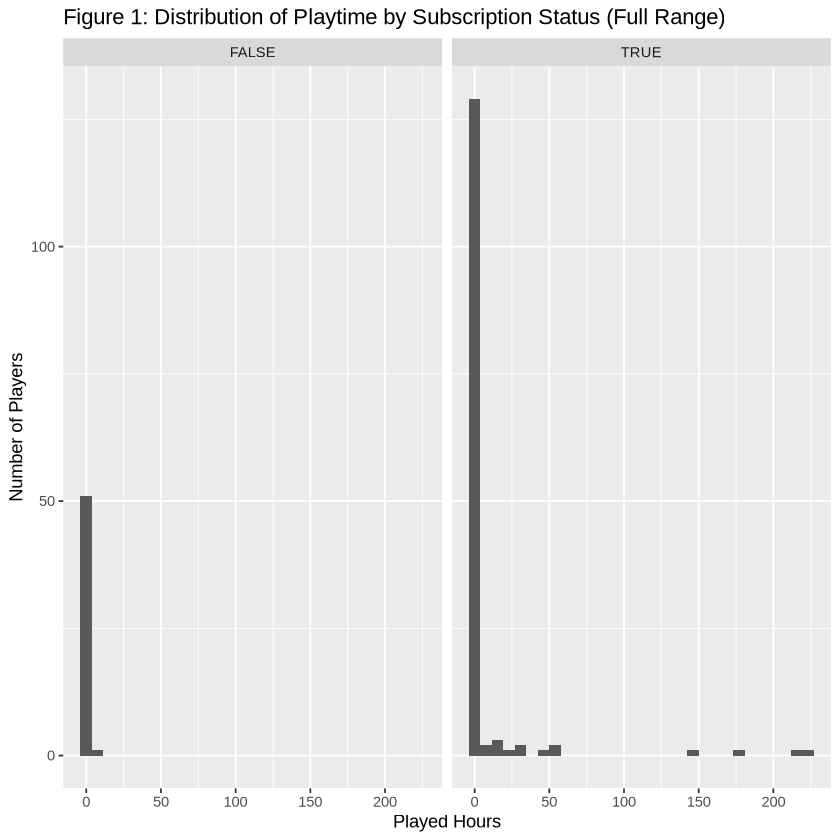

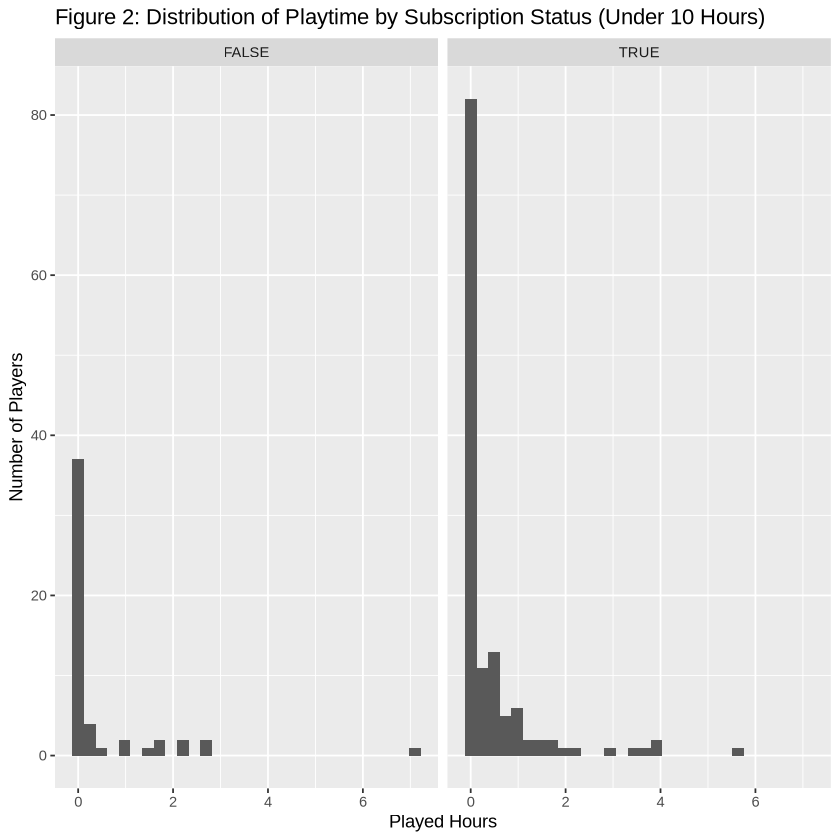

In [4]:
ggplot(players, aes(x=played_hours)) +
geom_histogram() + 
facet_grid(cols = vars(subscribe)) +
labs(title = "Figure 1: Distribution of Playtime by Subscription Status (Full Range)",
     x = "Played Hours",
     y = "Number of Players")

players |> filter(played_hours <= 10) |>
ggplot(aes(x=played_hours)) + geom_histogram() +
facet_grid(cols = vars(subscribe)) +
labs(title = "Figure 2: Distribution of Playtime by Subscription Status (Under 10 Hours)",
     x = "Played Hours",
     y = "Number of Players")

Figure 1 shows that playtime is highly skewed, with a few players having very high total hours.

Figure 2 focuses on players with 10 hours or less and shows that subscribers are concentrated in this low-playtime range, while non-subscribers are more spread out.

This suggests that casual players are more likely to subscribe, so played_hours is a relevant predictor for subscription.

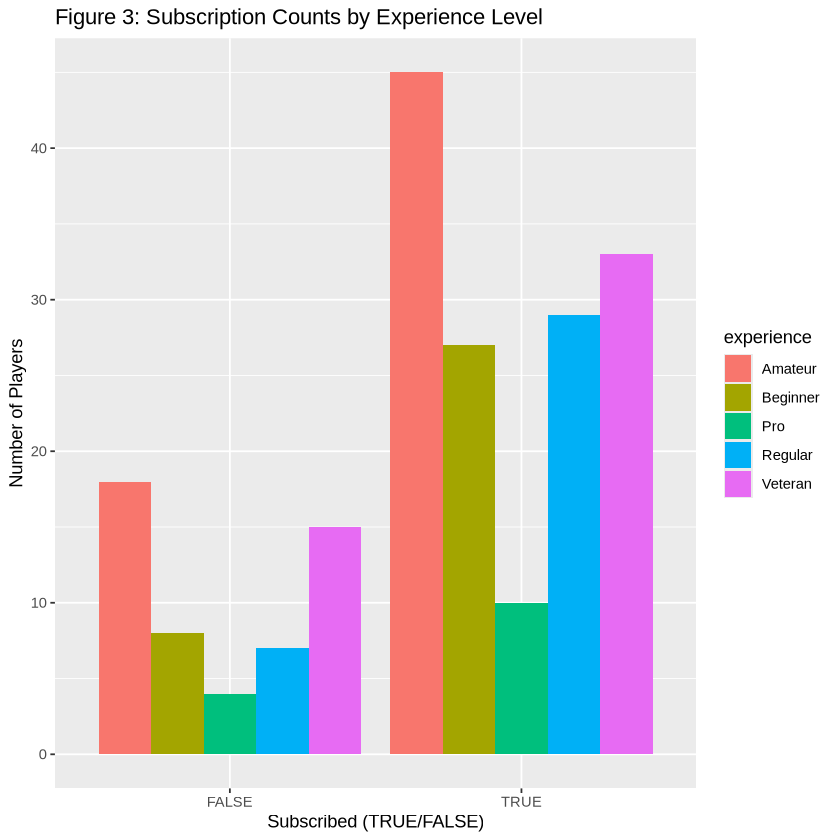

In [5]:
ggplot(players, aes(x=subscribe)) +
geom_bar(aes(fill=experience), position="dodge") +
labs(title = "Figure 3: Subscription Counts by Experience Level",
     x = "Subscribed (TRUE/FALSE)",
     y = "Number of Players")

Figure 3 shows that Veteran and Amateur players show more subscriptions, while Beginners and Pros subscribe less often.
Because subscription patterns differ across experience categories, experience appears to be a meaningful predictor.

**Data Analysis -- Model Building (KNN Classification)**

To use experience as a predictor in the KNN classifier, it must be converted into a numeric format. I chose ordinal encoding instead of one-hot encoding because the experience levels in this dataset have a natural order (Beginner → Regular → Amateur → Veteran → Pro). Assigning them values 1 through 5 preserves this ordering and reflects how player experience progresses. One-hot encoding would create five separate binary columns, which can distort distance calculations in KNN and make players with similar experience appear farther apart than they actually are. Ordinary encoding keeps the variable in a single column and allows KNN to treat experience differences in a more meaningful and consistent way.

In [6]:
library(tidymodels)
library(kknn)
set.seed(123)

clean_players |>
distinct (experience)

experience_encoded = factor(clean_players$experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"), ordered = TRUE)

experience_numeric = as.numeric(experience_encoded)

clean_players |> 
mutate(experience_numeric = experience_numeric) |>
select(c(1,6))

ordinary_players <- clean_players |>
mutate(experience_numeric = experience_numeric) |>
select (c(2,3,6))
ordinary_players


players_split <- initial_split(ordinary_players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test  <- testing(players_split)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


experience,experience_numeric
<chr>,<dbl>
Pro,5
Veteran,4
Amateur,2
Regular,3
Amateur,2
Veteran,4
Beginner,1
Amateur,2
Amateur,2


subscribe,played_hours,experience_numeric
<fct>,<dbl>,<dbl>
TRUE,30.3,5
TRUE,3.8,4
TRUE,0.7,2
TRUE,0.1,3
TRUE,0.1,2
TRUE,1.6,4
TRUE,1.5,1
TRUE,0.2,2
TRUE,48.4,2


We first checked the unique experience categories to understand their order. Since experience is recorded as text, it could not be directly used in KNN, which requires numerical predictors. To address this, we converted the variable into an ordered factor with the progression: Beginner → Amateur → Regular → Veteran → Pro. We then transformed this ordered factor into a numeric variable (experience_numeric), producing values 1–5 that reflect increasing experience level.

Next, we created a modelling dataset that keeps only the relevant variables for the classifier:
subscribe (response), played_hours, and the new experience_numeric predictor. This dataset forms the input for KNN.

We then split the data into 75% training and 25% testing, using strata = subscribe to preserve the proportion of TRUE/FALSE labels in both sets. This ensures that the classifier is evaluated fairly and avoids imbalance issues during model training.

In [7]:
set.seed(1123)

players_recipe <- recipe(subscribe ~ played_hours + experience_numeric, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

k_grid <- tibble(neighbors = 1:10)

players_folds <- vfold_cv(players_train, v = 5, strata = subscribe)

players_tune_fit <- workflow() |> 
add_recipe(players_recipe) |>
add_model(players_tune) |>
tune_grid(resamples = players_folds, grid = k_grid)

players_tune_accuracy  <- players_tune_fit |>
collect_metrics() |>
filter(.metric == "accuracy") |>
select (neighbors, mean) |> 
arrange(desc(mean))
players_tune_accuracy 

neighbors,mean
<int>,<dbl>
7,0.7788235
8,0.7788235
9,0.7788235
10,0.7788235
6,0.7670588
5,0.7403922
3,0.6047059
4,0.5811765
1,0.5396078


We selected k = 7 because it was the smallest k that achieved the highest cross-validated accuracy during tuning. Several values (k = 7, 8, 9, 10) produced the same accuracy, but choosing the smallest one makes the model slightly more flexible while still performing equally well.

**Visualization of the Analysis**

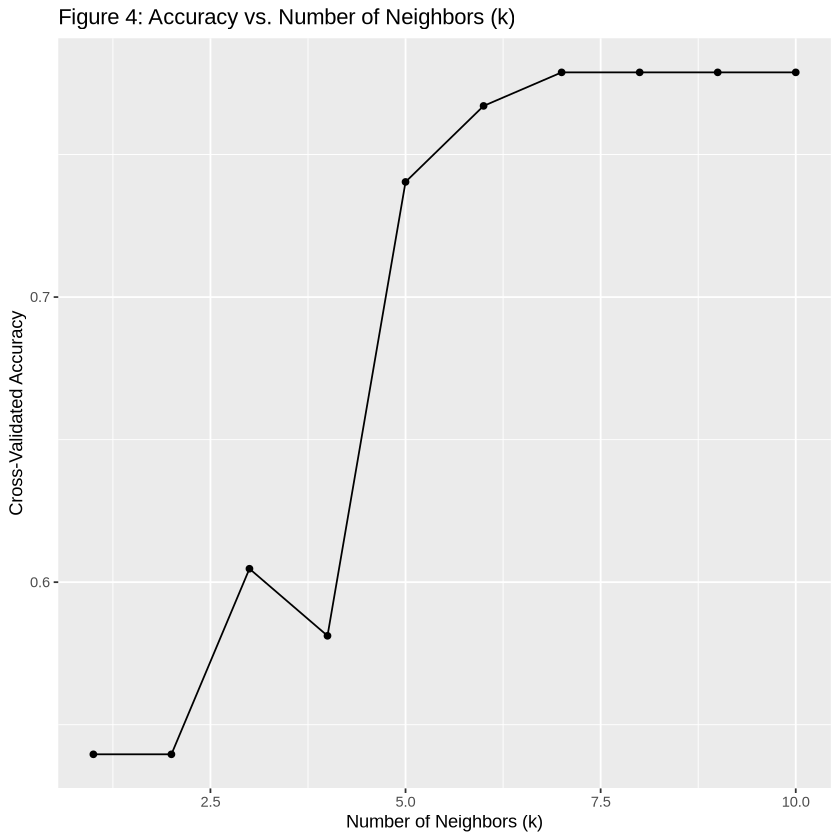

In [8]:
accuracy_vs_k <- players_tune_accuracy  |>
ggplot(aes(x = neighbors, y = mean)) +
geom_line() +
geom_point() +
labs(title = "Figure 4: Accuracy vs. Number of Neighbors (k)",
     x = "Number of Neighbors (k)",
     y = "Cross-Validated Accuracy")
accuracy_vs_k

.pred_class,subscribe,played_hours,experience_numeric
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,30.3,5
TRUE,TRUE,3.8,4
TRUE,TRUE,0.5,2
TRUE,TRUE,0.6,3
TRUE,FALSE,0.1,4
TRUE,TRUE,0.3,2
TRUE,TRUE,0.4,1
TRUE,FALSE,0.9,2
TRUE,TRUE,1.5,3


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.75
kap,binary,0.00


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE      7   21

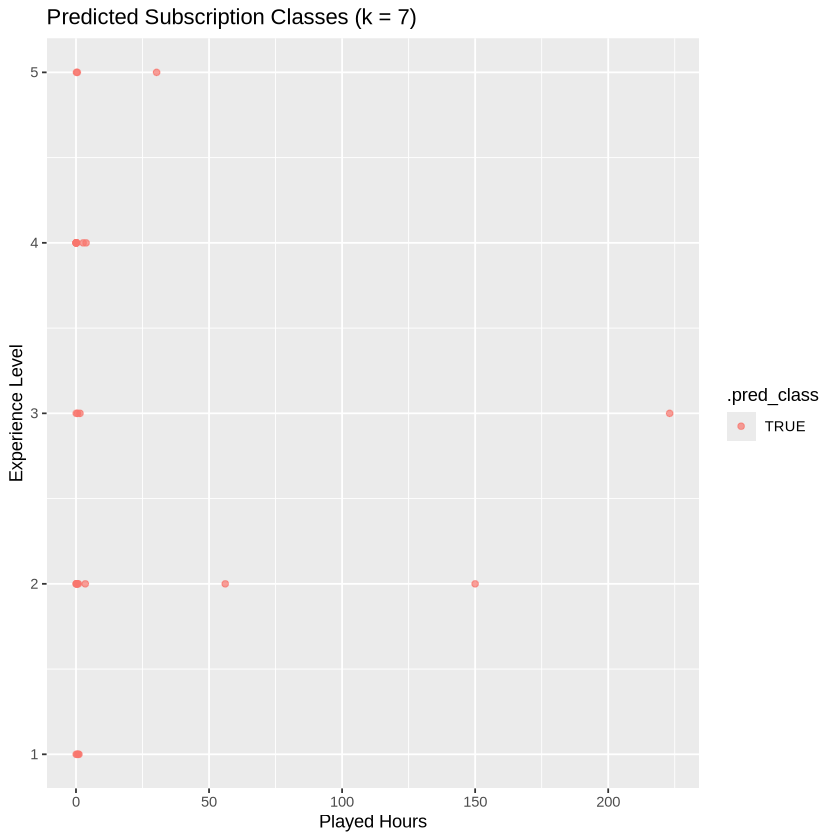

In [10]:
final_wf <- workflow() |>
add_recipe(players_recipe) |>
add_model(nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
set_engine("kknn") |>
set_mode("classification")) |>
fit(players_train)

test_predictions <- predict(final_wf, players_test) |>
bind_cols(players_test)

metrics <- test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class)

conf_mat <- test_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)

test_predictions
metrics
conf_mat

test_set <- test_predictions |>
mutate(predicted = .pred_class) |>
ggplot(aes(x = played_hours, y = experience_numeric, color = .pred_class)) +
geom_point(alpha = 0.7) +
labs(title = "Predicted Subscription Classes (k = 7)",
     x = "Played Hours",
     y = "Experience Level")
test_set

## Selected Question

In particular, I will use **experience**, **played_hours**, and **Age** as predictors to predict **subscribe**.  
This is a **KNN classification** problem since the response variable `subscribe` is categorical.  
Before performing classification, I will need to convert `experience` into a numeric format.

There are two ways to process the `experience` variable, and each has its own limitations:

1. **One-hot encoding:**  
   - Converts `experience` into five new columns: Pro, Veteran, Amateur, Regular, and Beginner, each coded as 0 or 1.  
   - **Limitation:** inflates feature count and may reduce KNN distance interpretability.

2. **Ordinal encoding:**  
   - Keeps `experience` as one column and assigns numeric values based on level:  
     `Pro = 5`, `Veteran = 4`, `Amateur = 3`, `Regular = 2`, `Beginner = 1`.  
   - **Limitation:** assumes equal spacing between levels that may not exist.

I will split the data into **75% training** and **25% testing sets** using set.seed(123) for reproducibility. 
**Cross-validation** will be used to **tune** and select the best value of k for the KNN model, based on the highest classification accuracy from validation folds.

After selecting the optimal k, I will train the model on the training data and evaluate its performance on the test set to measure how accurately it predicts subscription status. In addition to overall accuracy, I will also check precision and recall, since the number of subscribers and non-subscribers may be imbalanced.

Finally, I will discuss possible improvements, such as adding more predictors, handling outliers, or testing alternative encoding methods.